The below code shows descriptive analysis of a quantitative data set. In this case, and in order to show some of the capabilities of Python regarding statistical analysis, data involved in this assessment is related to house prices in Boston.
As usual, and as a general advice for any analytical work, the first step is to obtain the data set and have a very basic representation of the data to assess, from a high-level perspective, the attributes and characteristics, as well as aspects such as the number of variables, their ranges and, in sum, a general description.

In [3]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'boston.csv' 
data = pd.read_csv("data\\boston.csv") 

data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Once the data set has been printed, main characteristics may be extracted. For instance:
- This data set has 14 variables
- There are 506 records
- All values in each column are numerical

Further information can be obtained with summary statistics:

In [2]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Mean, Standars deviation, quartile, min and max are summarised in the above table.

When researching about this particular dataset, further information can be obtained regarding the columns and their meaning. In fact, depending on the site where this data set is obtained, some of the CSV files contain this extra piece of information. For this particular project the decision was to use the simplest form of the data set, with no additional data and therefore, a description of the columns was obtained online. Espcifically, the below description corresponds to the embbeded information provided by the scikit-learn Boston dataset (from sklearn.datasets import load_boston):

- **CRIM**  per capita crime rate by town
- **ZN**  proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**  proportion of non-retail business acres per town
- **CHAS**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**  nitric oxides concentration (parts per 10 million)
- **RM**  average number of rooms per dwelling
- **AGE**  proportion of owner-occupied units built prior to 1940
- **DIS**  weighted distances to five Boston employment centres
- **RAD**  index of accessibility to radial highways
- **TAX**  full-value property-tax rate per \$10,000
- **PTRATIO**  pupil-teacher ratio by town
- **B**  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**  \% lower status of the population
- **MEDV**  Median value of owner-occupied homes in \$1000's

Given this wide diversity of variables, summary characteristics are also quite heteregenous. In order to attempt obtaining more information about these variables the next step is to take them in consideration one by one and plot their distribution, looking for special characteristics that could help understand their distribution and behaviour.



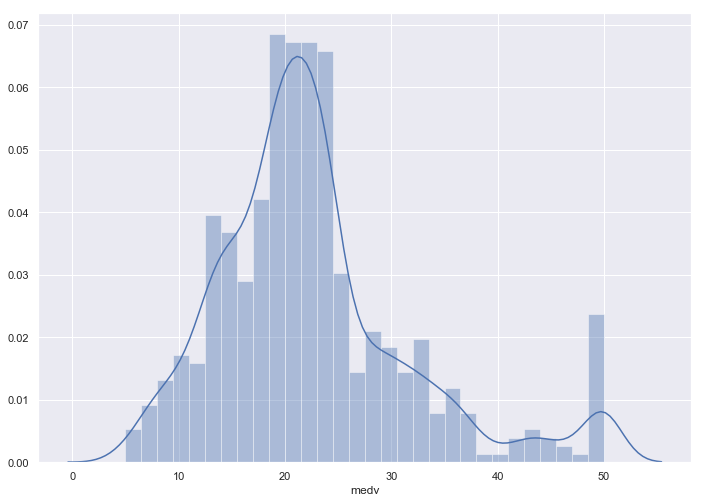

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['medv'], bins=30)
plt.show()

Use variable CHAS as a predictor for MEDV

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

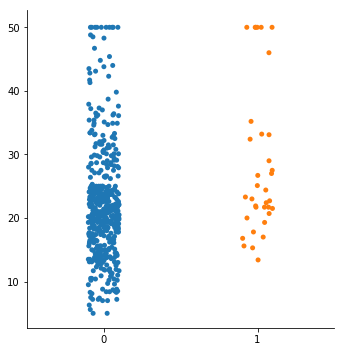

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

x=data['chas']
y=data['medv']


#sns.catplot(x=data['chas'],y=data['medv'],data=data)
sns.catplot(x=x,y=y,data=data)





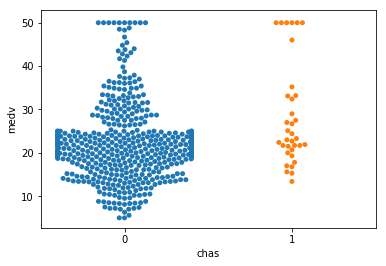

In [23]:
sns.swarmplot(x,y)

In [25]:
sns.lmplot(x=y,y=y,data=data);


KeyError: "None of [Float64Index([ 0.0,  1.0,  5.0,  5.6,  6.3,  7.0,  7.2,  7.4,  7.5,  8.1,\n              ...\n              43.8, 44.0, 44.8, 45.4, 46.0, 46.7, 48.3, 48.5, 48.8, 50.0],\n             dtype='float64', length=231)] are in the [columns]"

# TO DO:

1) Determine which variable is the independent (price)

2) Explore predictors

    2.1) Delete Outliers?

3) Correlation matrix to determine which predictors to use